# **Modeling and Evaluating**

## Objectives

* tell whether a given cherry leaf has powdery mildew or not.

## Inputs

* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* No Comments. 



---

# Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Set Working Directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

# Set input derectories

In [5]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

# Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


# Set Labels

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['healthy', 'powdery_mildew']


# Set image shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

---

# Number of images in train, test and validation

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


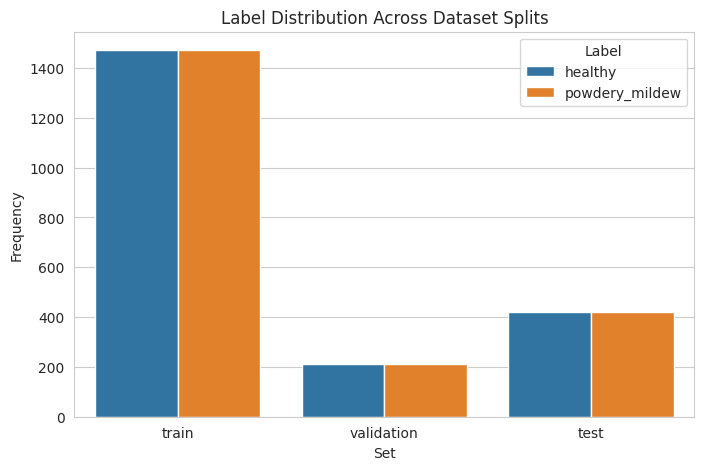

In [9]:
# Initialize an empty dictionary to store data
data = {'Set': [], 'Label': [], 'Frequency': []}

# Define the dataset splits
folders = ['train', 'validation', 'test']

# Populate the dictionary with data
for folder in folders:
    for label in labels:
        # Construct the path to the label directory
        label_dir = os.path.join(my_data_dir, folder, label)
        # Count the number of files in the label directory (handle missing directories)
        frequency = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        # Append data to the dictionary
        data['Set'].append(folder)
        data['Label'].append(label)
        data['Frequency'].append(frequency)
        # Print the count for each folder-label combination
        print(f"* {folder} - {label}: {frequency} images")

# Create a DataFrame from the dictionary
df_freq = pd.DataFrame(data)

# Plot the data
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.title("Label Distribution Across Dataset Splits")
plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)
plt.show()

# Image data Augmentation

Image Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-01-25 06:43:59.090693: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-25 06:43:59.367864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Inetialize Image Data Generator

In [11]:
augmented_image_data = ImageDataGenerator(
    # Normalization
    rescale=1.0 / 255,

    # Augmentation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,

    # Handling empty space
    fill_mode='nearest'
)

Augment training image dataset

In [12]:
# Set batch size
batch_size = 20  

# Generate augmented training data
train_set = augmented_image_data.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Display class indices
train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [13]:
validation_set = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

print(validation_set.class_indices)

Found 420 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


Augment test image dataset

In [14]:
test_set = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

print(test_set.class_indices)

Found 844 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


Plot augmented train, validation and test images

(20, 100, 100, 3)


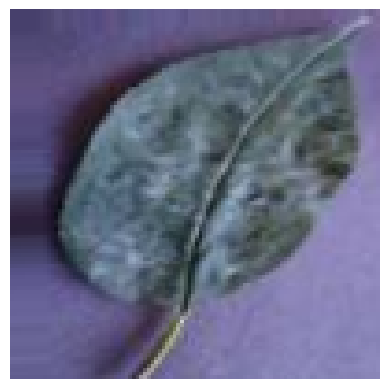

(20, 100, 100, 3)


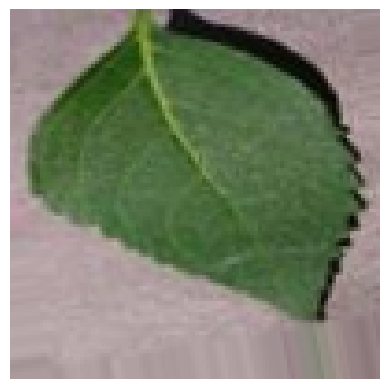

(20, 100, 100, 3)


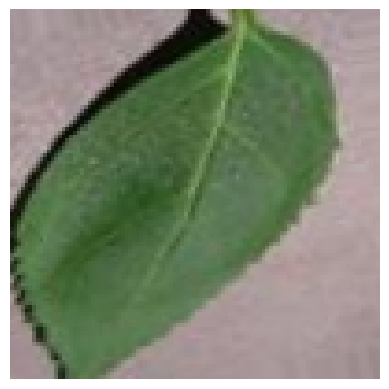

In [17]:
for _ in range(3):
    img, label = next(train_set)  # Fetch the next batch of images and labels
    print(img.shape)  # Print the shape of the image batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis("off")  # Hide the axes for a cleaner view
    plt.show()  # Show the image

(20, 100, 100, 3)


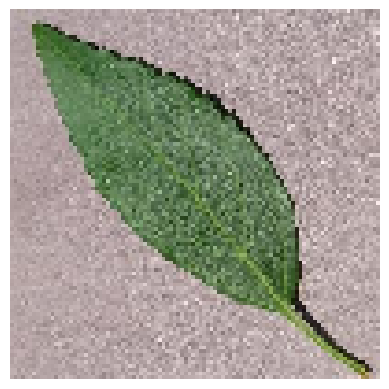

(20, 100, 100, 3)


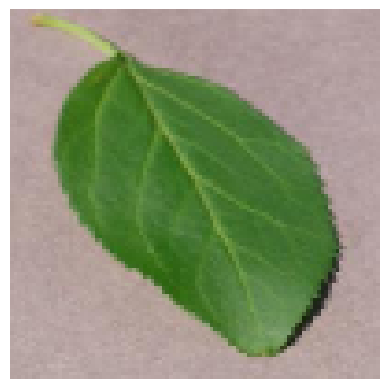

(20, 100, 100, 3)


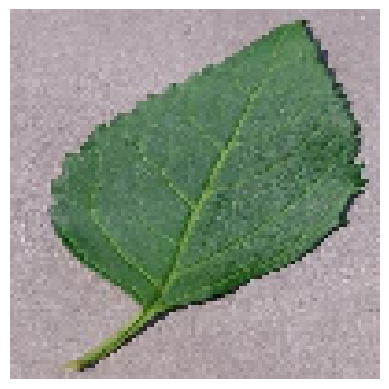

In [18]:
for _ in range(3):
    img, label = next(validation_set)  # Fetch the next batch of images and labels
    print(img.shape)  # Print the shape of the image batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis("off")  # Hide the axes for a cleaner view
    plt.show()  # Show the image

(20, 100, 100, 3)


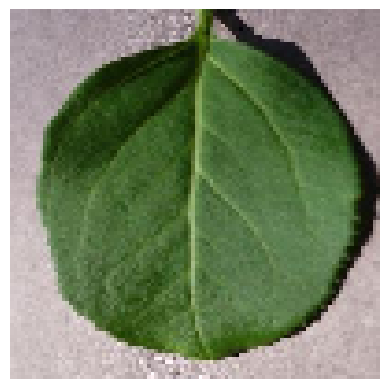

(20, 100, 100, 3)


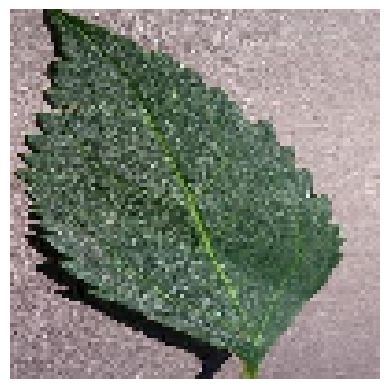

(20, 100, 100, 3)


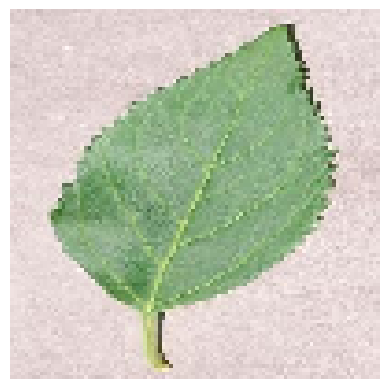

In [19]:
for _ in range(3):
    img, label = next(test_set)  # Fetch the next batch of images and labels
    print(img.shape)  # Print the shape of the image batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis("off")  # Hide the axes for a cleaner view
    plt.show()  # Show the image

Save class indices

In [20]:
# Save the class indices to a .pkl file
joblib.dump(value=train_set.class_indices, filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---